In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [5]:
current_path=os.getcwd()

In [6]:
print("total cats images:-",len(os.listdir(os.path.join(current_path,'Data','images','cats'))))

total cats images:- 349


In [7]:
print("total dogs images:-",len(os.listdir(os.path.join(current_path,'Data','images','dogs'))))

total dogs images:- 348


In [8]:
image_dir=os.path.join(current_path,'Data','images')

In [9]:
os.listdir(image_dir)

['cats', 'dogs']

In [10]:
cat_dog_dict= {'cats':[],'dogs':[]}
for dir in os.listdir(image_dir):
    directory_path =os.path.join(image_dir,dir)
    for images in os.listdir(directory_path):
        cat_dog_dict[dir].append(os.path.join(directory_path,images))


In [11]:
cat_dog_dict

{'cats': ['c:\\Users\\PARIMAL\\OneDrive\\Desktop\\Data Science Internship\\Data-Science\\Deep leraning\\CNN\\Data\\images\\cats\\cat_1.jpg',
  'c:\\Users\\PARIMAL\\OneDrive\\Desktop\\Data Science Internship\\Data-Science\\Deep leraning\\CNN\\Data\\images\\cats\\cat_10.jpg',
  'c:\\Users\\PARIMAL\\OneDrive\\Desktop\\Data Science Internship\\Data-Science\\Deep leraning\\CNN\\Data\\images\\cats\\cat_100.jpg',
  'c:\\Users\\PARIMAL\\OneDrive\\Desktop\\Data Science Internship\\Data-Science\\Deep leraning\\CNN\\Data\\images\\cats\\cat_101.jpg',
  'c:\\Users\\PARIMAL\\OneDrive\\Desktop\\Data Science Internship\\Data-Science\\Deep leraning\\CNN\\Data\\images\\cats\\cat_102.jpg',
  'c:\\Users\\PARIMAL\\OneDrive\\Desktop\\Data Science Internship\\Data-Science\\Deep leraning\\CNN\\Data\\images\\cats\\cat_103.jpg',
  'c:\\Users\\PARIMAL\\OneDrive\\Desktop\\Data Science Internship\\Data-Science\\Deep leraning\\CNN\\Data\\images\\cats\\cat_104.jpg',
  'c:\\Users\\PARIMAL\\OneDrive\\Desktop\\Data Sci

In [12]:
from PIL import Image 

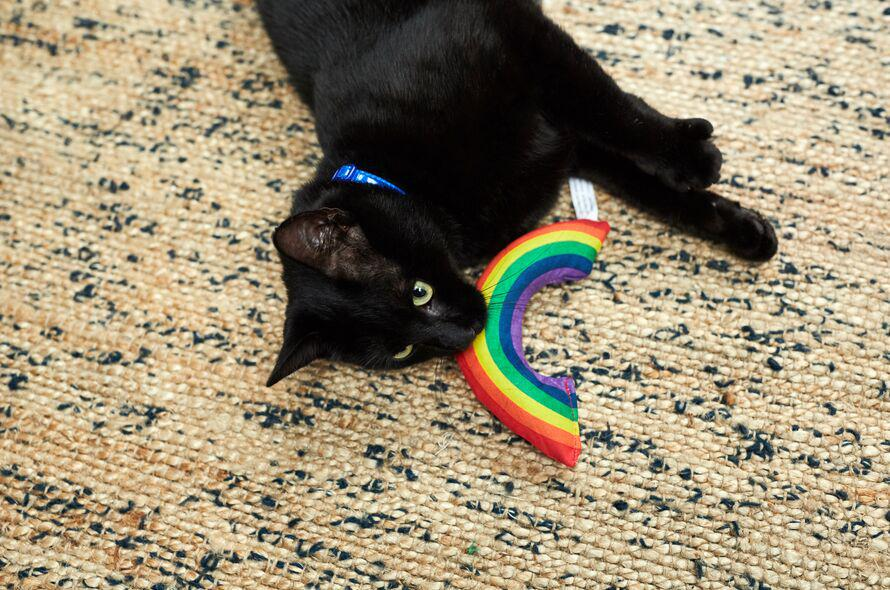

In [13]:
Image.open(cat_dog_dict['cats'][11])

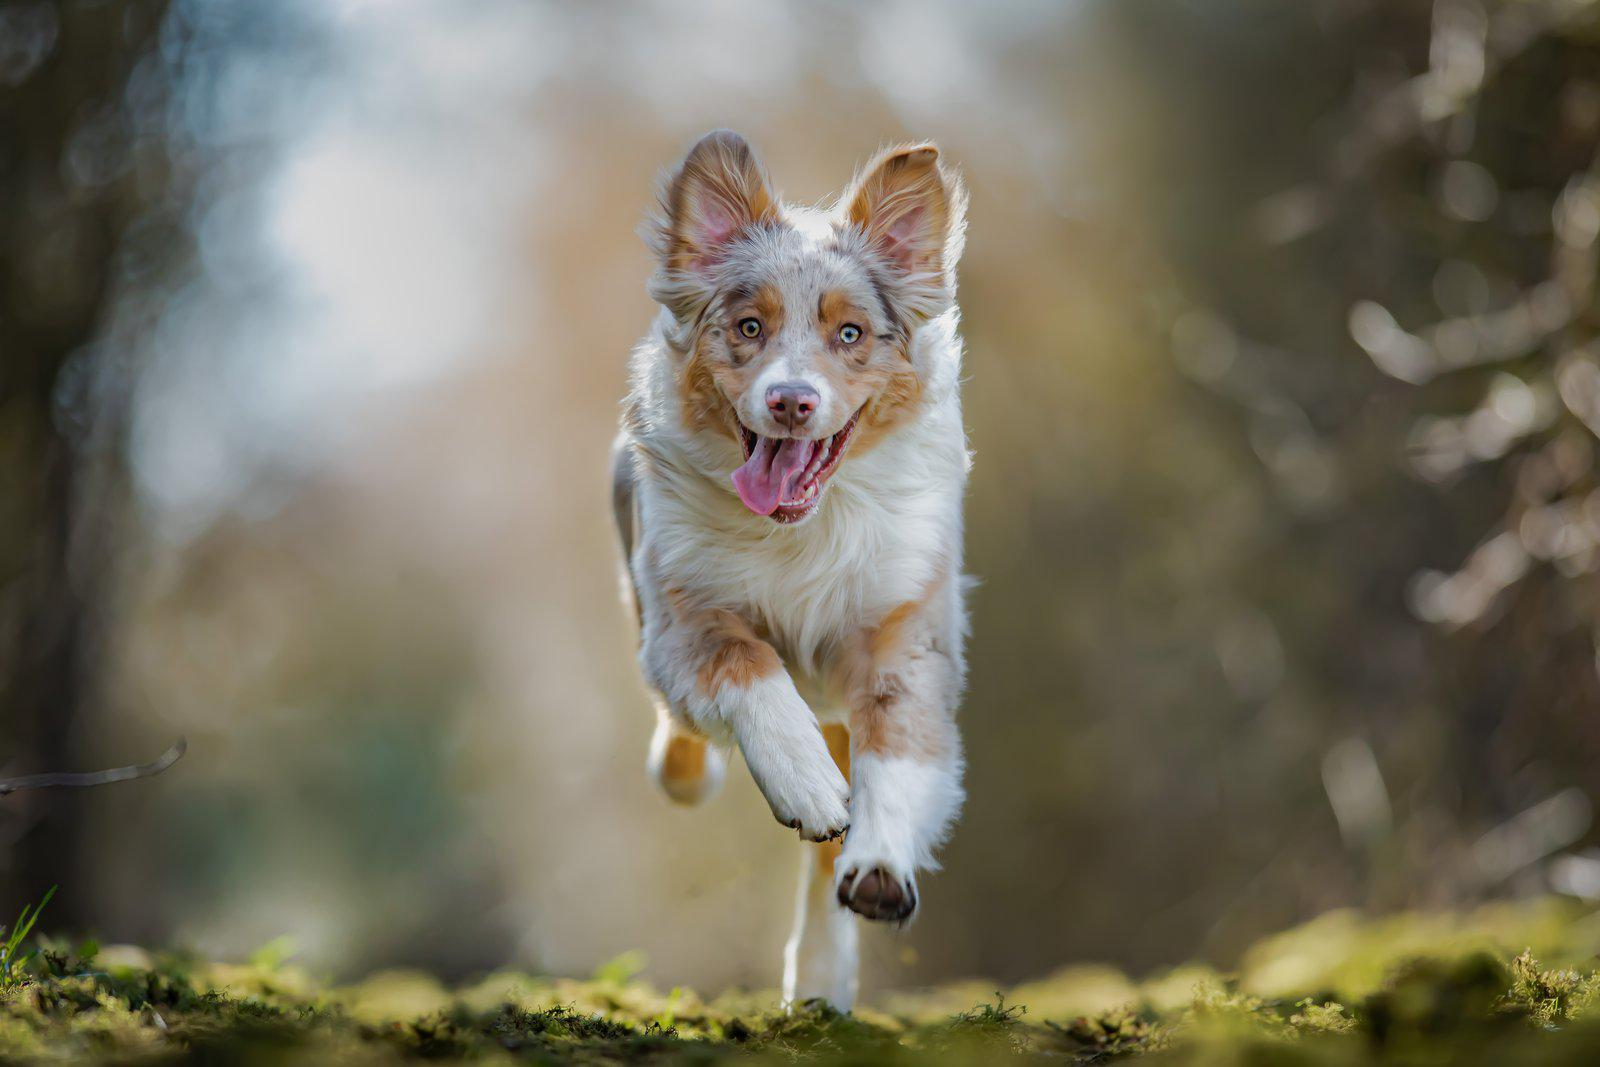

In [14]:
Image.open(cat_dog_dict['dogs'][0])

In [15]:
cat_dog_dict.keys()

dict_keys(['cats', 'dogs'])

In [16]:
import cv2 

In [17]:
img_arr_lst = [ ]
labels = []
for key , val in cat_dog_dict.items():
    for img in val:
        img_arr = cv2.imread(img)
        resized_img=cv2.resize(img_arr,(224,224))
        img_arr_lst.append(resized_img)
        labels.append(key)

In [18]:
img_arr_lst=np.array(img_arr_lst 
)

In [19]:
img_arr_lst.shape

(697, 224, 224, 3)

In [20]:
labels=np.array(labels)

In [21]:
labels.shape 

(697,)

In [22]:
labels

array(['cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
      

In [23]:
labels=np.array([1 if item =='dogs' else 0 for item in list(labels)])

In [24]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(img_arr_lst,labels,test_size=0.2)

In [26]:
x_train=x_train/255
x_test=x_test/255

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((557, 224, 224, 3), (140, 224, 224, 3), (557,), (140,))

In [28]:
model=Sequential(
    [
        Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
        MaxPooling2D(2,2),
        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128,activation='relu'),
        Dense(1,activation='sigmoid')
    ]



)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10, batch_size=32)

C:\Users\PARIMAL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 425ms/step - accuracy: 0.5193 - loss: 7.6015
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 390ms/step - accuracy: 0.5057 - loss: 0.6982
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 399ms/step - accuracy: 0.6213 - loss: 0.6646
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 390ms/step - accuracy: 0.7675 - loss: 0.5602
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 383ms/step - accuracy: 0.8180 - loss: 0.4307
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 387ms/step - accuracy: 0.9032 - loss: 0.2873
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 383ms/step - accuracy: 0.9398 - loss: 0.1833
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 411ms/step - accuracy: 0.9674 - loss: 0.1124
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 392ms/step - accuracy: 0.9820 - loss: 0.0798
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 387ms/step - accuracy: 0.9958 - loss: 0.0323


In [29]:
pred =model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


In [30]:
pred =(pred>0.5).astype(int).ravel()

In [31]:
pred


array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1])

In [32]:
y_test

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1])